In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


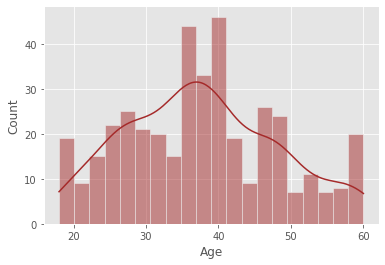

In [6]:
sns.histplot(df['Age'],kde=True,color='brown',bins=20)
plt.show()

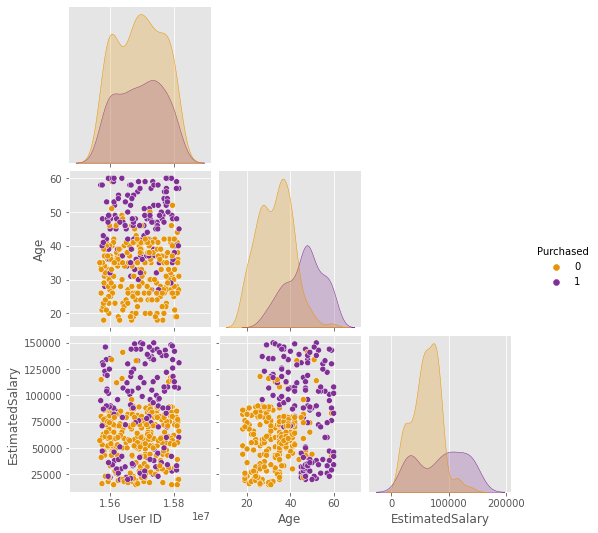

In [7]:
sns.pairplot(df , hue = 'Purchased',palette='CMRmap_r',corner=True )

In [8]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [9]:
X = df.drop("Purchased", axis = 1)
y = df['Purchased']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state = 100)

In [11]:
col = X.columns
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns = col)
X_test = pd.DataFrame(X_test, columns = col)

In [12]:
X_test.shape

(100, 4)

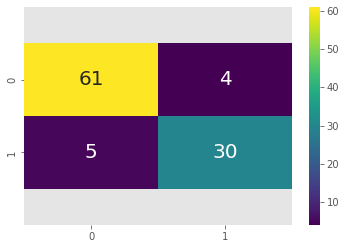

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,metric = 'minkowski', p=2)
knn_classifier.fit(X_train, y_train)
pred=knn_classifier.predict(X_test)
con=confusion_matrix(y_test,pred)
ax=sns.heatmap(con,annot=True,cmap="viridis",annot_kws={"size":20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        65
           1       0.88      0.86      0.87        35

    accuracy                           0.91       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [15]:
error_rate=[]
for i in range (1,31): 
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.1,
 0.13,
 0.09,
 0.11,
 0.07,
 0.09,
 0.1,
 0.1,
 0.09,
 0.09,
 0.08,
 0.08,
 0.07,
 0.1,
 0.08,
 0.13,
 0.13,
 0.14,
 0.11,
 0.12,
 0.11,
 0.14,
 0.12,
 0.15,
 0.15,
 0.17,
 0.15,
 0.17,
 0.16,
 0.18]

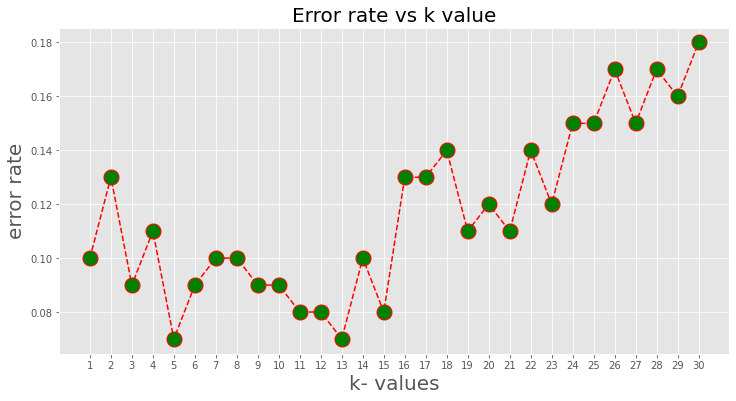

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

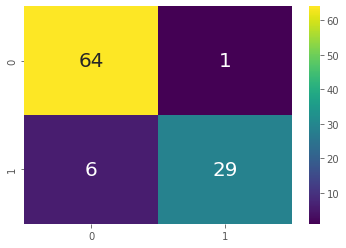

In [17]:
clf=KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()

In [18]:
print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        65
           1       0.97      0.83      0.89        35

    accuracy                           0.93       100
   macro avg       0.94      0.91      0.92       100
weighted avg       0.93      0.93      0.93       100

